In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/noshowappointments/KaggleV2-May-2016.csv


#### 📘TITLE:
Modeling Patient No-Shows Using Binomial Distribution



### 🎯 Objective
In this notebook, we use the binomial distribution to analyze and model the probability of patients not showing up for their medical appointments.

This is a classic binary problem (Show / No-show), which makes it ideal for applying binomial probability modeling.

Key Goals:
- Estimate the probability of a patient missing an appointment.
- Use binomial distribution to calculate expected no-shows.
- Compare real-world data vs. theoretical expectations.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom
df=pd.read_csv("/kaggle/input/noshowappointments/KaggleV2-May-2016.csv")
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


### 🔍 Dataset Features
- **No-show**: Our target variable (Yes = did NOT show up).
- We will focus on modeling the `No-show` column as a binary outcome.


In [3]:
print(df['No-show'].unique())

['No' 'Yes']


In [4]:
df['No-show'] = df['No-show'].map({'Yes': 1, 'No': 0})
df.head()


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,0
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,0
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,0
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,0


### 🧹 Cleaned Dataset

We converted the target variable `No-show` into binary form:
- 1 → Did not show up
- 0 → Showed up

This allows us to treat each appointment as a Bernoulli trial.


In [5]:
p=df['No-show'].mean()
n=100
print(f"Estimated probability of No-show (p)={p}")


Estimated probability of No-show (p)=0.20193255946510807


### 📌 Probability of No-Show

From the data:
- Estimated probability `p` = ~0.20 (20%)
- Total number of trials (n) = 100 (for simulation)

Each appointment is an independent Bernoulli trial. The total number of no-shows in `n` appointments follows a **binomial distribution**:  
**X ~ Binomial(n=100, p=0.20)**


In [6]:
x=np.arange(0,n+1)   #makes a array with numbers containing from 0 to n
pmf=binom.pmf(x,n,p)

<function matplotlib.pyplot.show(close=None, block=None)>

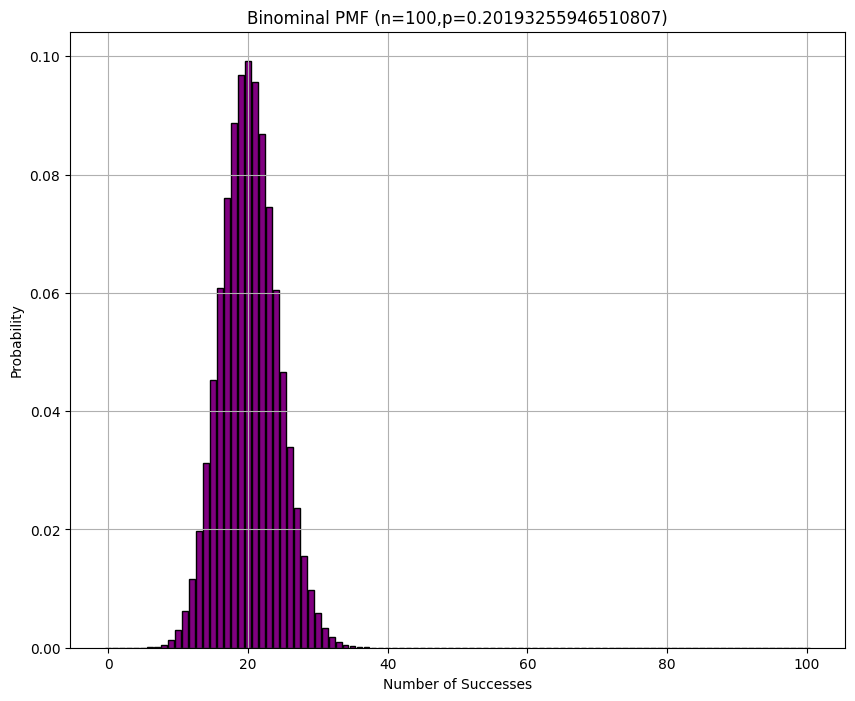

In [7]:
plt.figure(figsize=(10,8))
plt.bar(x,pmf,color='purple',edgecolor='black')
plt.xlabel('Number of Successes')
plt.ylabel('Probability')
plt.title(f'Binominal PMF (n={n},p={p})')
plt.grid()
plt.show


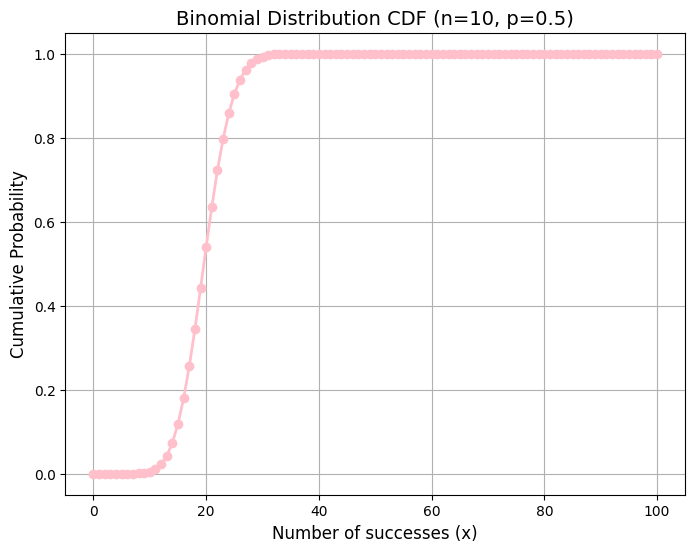

In [8]:
cdf = binom.cdf(x, n, p)
plt.figure(figsize=(8, 6))
plt.plot(x, cdf, color='pink', marker='o', linestyle='-', linewidth=2)
plt.title('Binomial Distribution CDF (n=10, p=0.5)', fontsize=14)
plt.xlabel('Number of successes (x)', fontsize=12)
plt.ylabel('Cumulative Probability', fontsize=12)
plt.grid(True)
plt.show()



### 📊 Visualization

This plot shows the probability distribution of the number of patients not showing up out of 100 scheduled appointments.

Most probable outcome ≈ 20 no-shows.  
It’s highly unlikely to have more than 35 no-shows.


### ✅ Conclusion

- We modeled the patient appointment data using a **Binomial Distribution**, treating each appointment as a Bernoulli trial (either the patient shows up or doesn't).
- The overall **probability of a no-show** in this dataset is approximately **20%** (`p ≈ 0.20`).
- Using this, we visualized the **distribution of expected no-shows** out of 100 appointments.
- The binomial model gives valuable insight into **how many missed appointments a clinic should expect** and helps in planning resources (doctors, staff, beds).

📌 This type of statistical modeling is crucial in healthcare operations to:
- Anticipate **patient turnout**
- Avoid **overbooking or underutilization**
- Drive decisions like **sending reminders or scheduling follow-ups**
